# Decision Trees

In [119]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree
import os
import dataframe_image as dfi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score


# Mass Shootings

In [120]:
# reading the dataset
df = pd.read_csv("gunviolencearchive_mass_shooting_all_years.csv")

# cleaning up a little bit
df = df.fillna(0)
df['Target'] = (df['Victims Killed'] > 0).astype(int)
df.head()


,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Target
0,3106715,"December 31, 2024",California,Oakland,200 block of Second St,1,3,0,0,0,0.0,1
1,3107076,"December 31, 2024",Mississippi,Natchez,Finger Ln and Lower Woodville Rd,1,5,0,0,1,0.0,1
2,3105091,"December 30, 2024",New York,Bronx,3544 White Plains Rd,0,6,0,0,0,0.0,0
3,3105154,"December 30, 2024",New York,Rochester,100 block of Hollenbeck St,0,4,0,0,0,0.0,0
4,3103855,"December 28, 2024",West Virginia,Grantsville,5957 Pine Creek Rd,2,2,0,0,1,0.0,1


In [121]:
features = ['Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [122]:
# No. of instance with 1 in target variable for training set
display(y_train.value_counts()) 

# No. of instance with 1 in target variable for test set
display(y_test.value_counts())

Target
1    1911
0    1717
Name: count, dtype: int64

Target
1    850
0    705
Name: count, dtype: int64

In [123]:
# display the data after splitting

# training set
display(pd.DataFrame(X_train).head(10))
display(pd.DataFrame(y_train).head(10))

# combine X_train and y_train for better visualization
train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=["Target"])], axis=1)
display(train_df.head(10))
os.makedirs('../../recourses/img/tables', exist_ok=True)
dfi.export(train_df.head(10), '../recourses/img/tables/dt_train_mass.png', table_conversion='chrome')

# test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())

# combine X_test and y_test for better visualization
test_df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test, columns=["Target"])], axis=1)
display(test_df.head(10))
os.makedirs('../../recourses/img/tables', exist_ok=True)
dfi.export(test_df.head(10), '../recourses/img/tables/dt_test_mass.png', table_conversion='chrome')

,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
620,3,0,0,4
621,8,0,0,0
3144,2,0,0,1
2770,4,0,0,0
2201,3,0,0,0
5136,3,0,0,0
4001,3,0,0,0
1563,5,0,0,0
4654,5,0,0,0
3564,3,0,0,4


,Target
620,1
621,0
3144,1
2770,0
2201,1
5136,1
4001,1
1563,0
4654,0
3564,1


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Target
620,3,0,0,4,1
621,8,0,0,0,0
3144,2,0,0,1,1
2770,4,0,0,0,0
2201,3,0,0,0,1
5136,3,0,0,0,1
4001,3,0,0,0,1
1563,5,0,0,0,0
4654,5,0,0,0,0
3564,3,0,0,4,1


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
4754,9,0,0,0
5161,5,0,0,0
2027,4,0,0,0
405,4,0,0,0
2470,4,0,0,5


,Target
4754,0
5161,0
2027,0
405,0
2470,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Target
4754,9,0,0,0,0
5161,5,0,0,0,0
2027,4,0,0,0,0
405,4,0,0,0,0
2470,4,0,0,5,0
2058,4,0,0,1,0
601,4,0,0,1,0
4085,3,0,2,2,1
4531,5,0,0,0,0
376,4,0,0,1,0


In [124]:
# Scaling the features
# Feature scaling is performed to ensure that the model is not biased towards the features with higher magnitude

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [125]:
# Displaying the scaled training set

display(pd.DataFrame(X_train).head())

,0,1,2,3
0,-0.158232,-0.242881,-0.172545,3.082706
1,0.500856,-0.242881,-0.172545,-0.543184
2,-0.290049,-0.242881,-0.172545,0.363289
3,-0.026414,-0.242881,-0.172545,-0.543184
4,-0.158232,-0.242881,-0.172545,-0.543184


In [126]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)
preds

array([1, 0, 0, ..., 0, 1, 1], shape=(1555,))

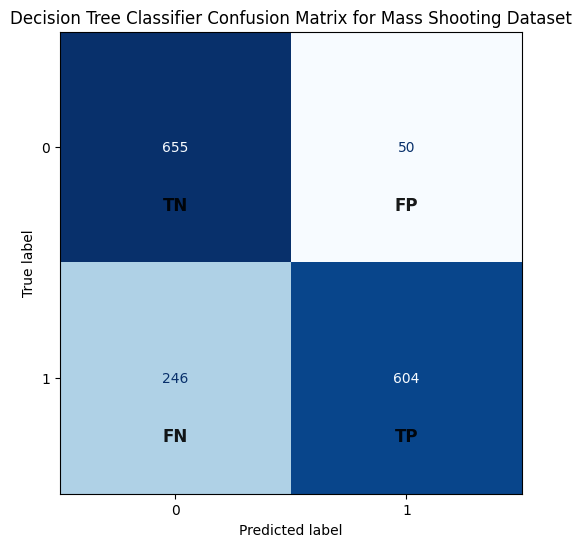

In [127]:
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= classifier.classes_)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
ax.set_title("Decision Tree Classifier Confusion Matrix for Mass Shooting Dataset")

# Label coordinates (slightly below numeric counts)
offset_y = -0.25  # small downward shift from center
offset_x = -0.5      # small horizontal shift

# Overlay TN / FP / FN / TP *below* the numbers
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label, color = "TN", "black"
        elif i == 0 and j == 1:
            label, color = "FP", "black"
        elif i == 1 and j == 0:
            label, color = "FN", "black"
        else:
            label, color = "TP", "black"

        ax.text(j + 0.5 + offset_x, i + 0.5 + offset_y, label,
                color=color, fontsize=12, weight='bold',
                ha='center', va='center', alpha=0.9)
disp

Accuracy:  0.8096463022508038
F1 Score:  0.8031914893617021
Recall Score:  0.7105882352941176


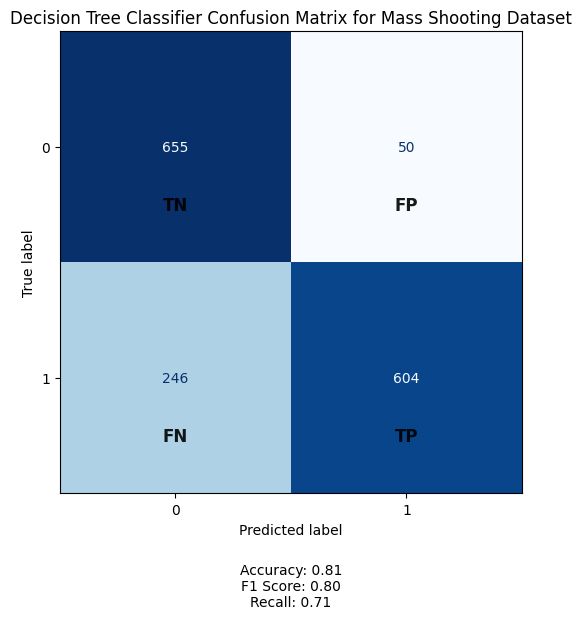

In [128]:
# Accuracy, F1 score, and Recall score
accuracy = accuracy_score(y_test, preds) # measures the overall correctness of the model i.e. how many predictions were accurate
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall Score: ", recall)

# add accuraacy, f1 score, and recall score to the confusion matrix plot
ax.text(0.5, -0.2, f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}',
        fontsize=10, ha='center', va='center', transform=ax.transAxes)
disp.figure_.savefig('../recourses/img/plots/dt_cm_mass.png', bbox_inches='tight', dpi=300)
disp.figure_

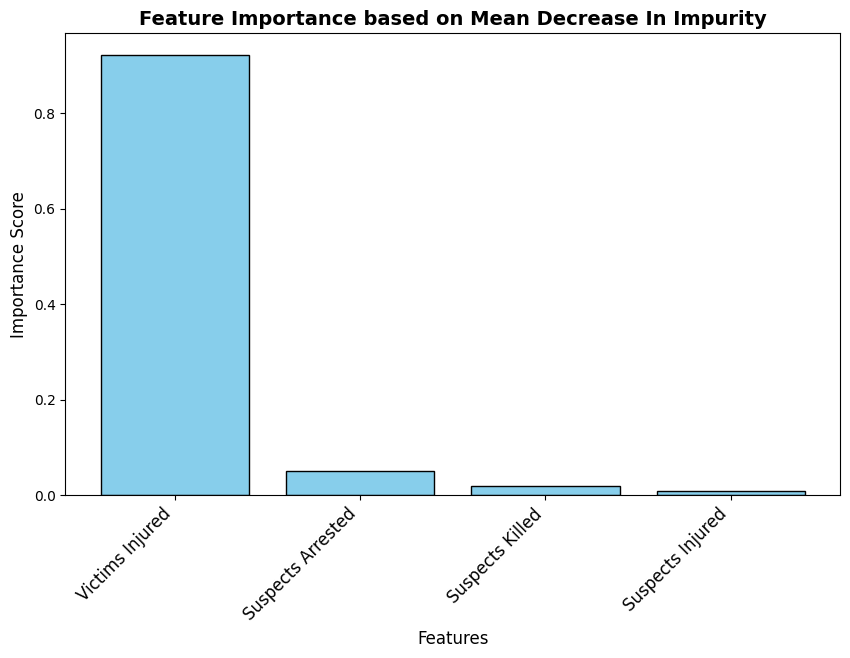

In [129]:
# Visualize Feature Importance

importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance based on Mean Decrease In Impurity", fontsize = 14, weight = 'bold')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center', color = 'skyblue', edgecolor = 'black')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation = 45, ha = 'right', fontsize = 12)
plt.xlabel("Features", fontsize = 12)
plt.ylabel("Importance Score", fontsize = 12)
plt.savefig('../recourses/img/plots/dt_feature_importance_mass.png', bbox_inches='tight', dpi=300)
plt.show()

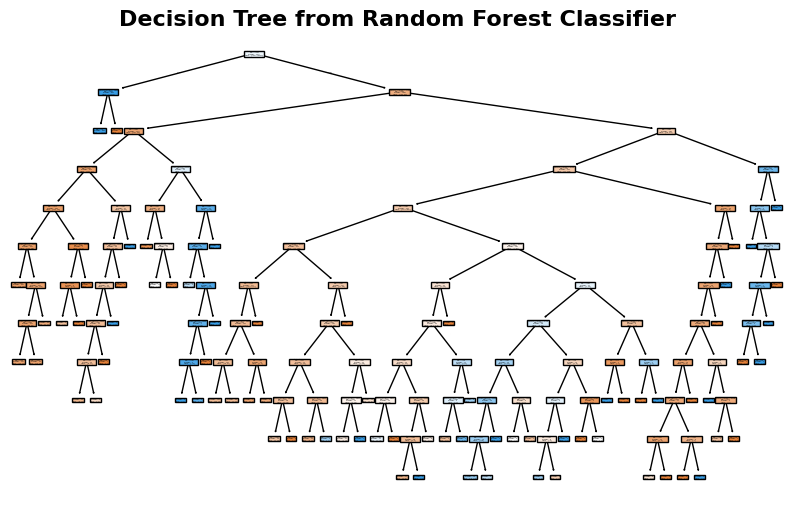

In [130]:
# Visualizing the Decision Tree for a Random Forest Classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(classifier.estimators_[0], feature_names = features, filled = True)
plt.title("Decision Tree from Random Forest Classifier", fontsize=16, weight='bold')
plt.savefig('../recourses/img/plots/dt_rf_mass.png', bbox_inches='tight', dpi=300)
plt.show()

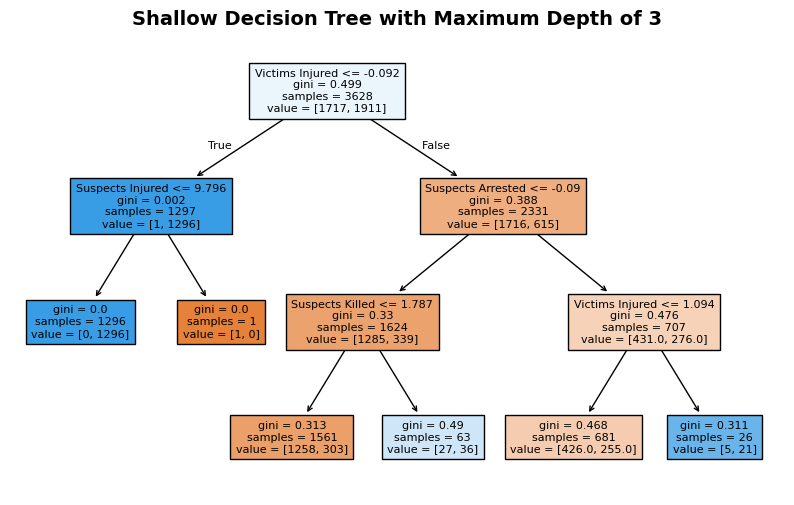

In [131]:
shallow = DecisionTreeClassifier(max_depth=3, random_state=0)
shallow.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(shallow, feature_names=features, filled=True, fontsize=8)
plt.title("Shallow Decision Tree with Maximum Depth of 3", fontsize=14, weight='bold')
plt.savefig('../recourses/img/plots/dt_shallow_mass.png', bbox_inches='tight', dpi=300)
plt.show()

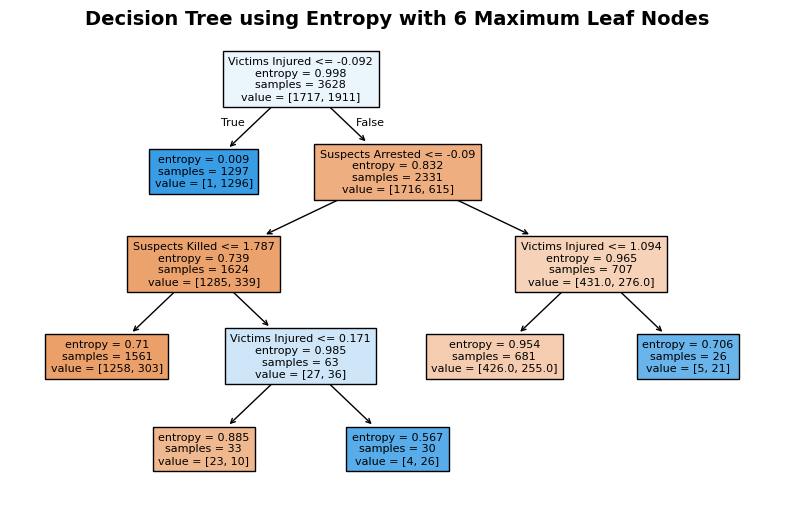

In [132]:
# Entropy-based tree with limited leaves (different splitting criterion)
entropy_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=0)
entropy_dt.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(entropy_dt, feature_names=features, filled=True, fontsize=8)
plt.title("Decision Tree using Entropy with 6 Maximum Leaf Nodes", fontsize=14, weight='bold')
plt.savefig('../recourses/img/plots/dt_entropy_mass.png', bbox_inches='tight', dpi=300)
plt.show()

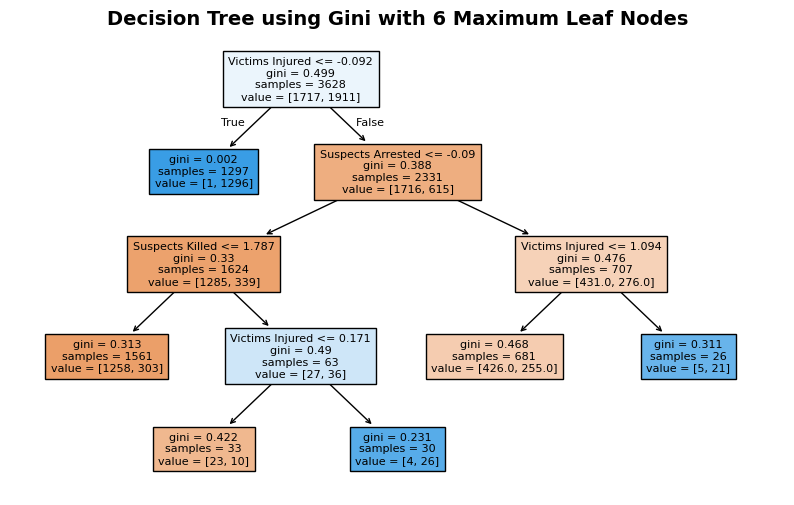

In [133]:
# Gini-based tree with limited leaves (different splitting criterion)
gini_dt = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=6, random_state=0)
gini_dt.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(gini_dt, feature_names=features, filled=True, fontsize=8)
plt.title("Decision Tree using Gini with 6 Maximum Leaf Nodes", fontsize=14, weight='bold')
plt.savefig('../recourses/img/plots/dt_gini_mass.png', bbox_inches='tight', dpi=300)
plt.show()

## School Shootings

In [134]:
# reading the dataset
df = pd.read_csv("gunviolencearchive_school_shooting.csv")

# cleaning up a little bit
df = df.fillna(0)
df['Target'] = (df['Victims Killed'] > 0).astype(int)
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Business/Location Name,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Target
0,3102636,"December 26, 2024",Washington,Pullman,800 block of NE California St,0,1,0,0,0,1,0.0,1
1,3099438,"December 20, 2024",South Carolina,Blythewood,180 Turkey Farm Rd,Westwood High School,0,0,0,0,1,0.0,0
2,3138348,"December 20, 2024",Massachusetts,Lynn,235 O'Callaghan Way,Classical High School,0,0,0,0,1,0.0,0
3,3098581,"December 19, 2024",Illinois,Oreana,400 W South St,Argenta-Oreana Elementary School,0,0,0,0,1,0.0,0
4,3098506,"December 19, 2024",Arkansas,Paragould,US-412 and Co Rd 808,0,0,0,1,0,0,0.0,0


In [135]:
features = ['Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [136]:
# No. of instance with 1 in target variable for training set
display(y_train.value_counts())

# No. of instance with 1 in target variable for test set
display(y_test.value_counts())

Target
0    5591
1     189
Name: count, dtype: int64

Target
0    2391
1      87
Name: count, dtype: int64

In [137]:
# display the data after splitting

# training set
display(pd.DataFrame(X_train).head(10))
display(pd.DataFrame(y_train).head(10))

# combine X_train and y_train for better visualization
train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=["Target"])], axis=1)
display(train_df.head(10))
os.makedirs('../../recourses/img/tables', exist_ok=True)
dfi.export(train_df.head(10), '../recourses/img/tables/dt_train_school.png', table_conversion='chrome')

# test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())

# combine X_test and y_test for better visualization
test_df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test, columns=["Target"])], axis=1)
display(test_df.head(10))
os.makedirs('../../recourses/img/tables', exist_ok=True)
dfi.export(test_df.head(10), '../recourses/img/tables/dt_test_school.png', table_conversion='chrome')

,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
4874,0,0,0,0
4661,0,0,0,0
5824,0,0,0,0
5492,0,0,0,1
3501,1,0,0,1
2039,0,0,0,1
5187,0,0,0,1
871,0,0,0,1
7970,0,0,0,1
1864,0,0,0,2


,Target
4874,0
4661,0
5824,0
5492,0
3501,0
2039,0
5187,0
871,0
7970,0
1864,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Target
4874,0,0,0,0,0
4661,0,0,0,0,0
5824,0,0,0,0,0
5492,0,0,0,1,0
3501,1,0,0,1,0
2039,0,0,0,1,0
5187,0,0,0,1,0
871,0,0,0,1,0
7970,0,0,0,1,0
1864,0,0,0,2,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
3490,0,0,0,1
1831,0,0,0,1
635,0,0,0,1
7821,2,0,0,1
5135,0,0,0,1


,Target
3490,0
1831,0
635,0
7821,0
5135,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Target
3490,0,0,0,1,0
1831,0,0,0,1,0
635,0,0,0,1,0
7821,2,0,0,1,0
5135,0,0,0,1,0
1035,0,0,0,1,0
541,0,0,0,1,0
388,0,0,0,1,0
6932,0,0,0,1,0
8091,0,0,0,0,0


In [138]:
# Scaling the features
# Feature scaling is performed to ensure that the model is not biased towards the features with higher magnitude

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [139]:
# Displaying the scaled training set

display(pd.DataFrame(X_train).head())

,0,1,2,3
0,-0.192369,-0.102472,-0.093399,-1.183315
1,-0.192369,-0.102472,-0.093399,-1.183315
2,-0.192369,-0.102472,-0.093399,-1.183315
3,-0.192369,-0.102472,-0.093399,0.235681
4,1.322475,-0.102472,-0.093399,0.235681


In [140]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], shape=(2478,))

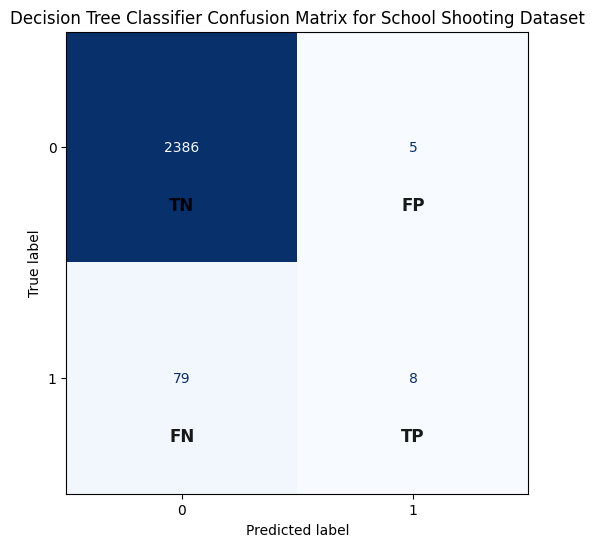

In [141]:
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= classifier.classes_)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
ax.set_title("Decision Tree Classifier Confusion Matrix for School Shooting Dataset")

# Label coordinates (slightly below numeric counts)
offset_y = -0.25  # small downward shift from center
offset_x = -0.5      # small horizontal shift

# Overlay TN / FP / FN / TP *below* the numbers
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label, color = "TN", "black"
        elif i == 0 and j == 1:
            label, color = "FP", "black"
        elif i == 1 and j == 0:
            label, color = "FN", "black"
        else:
            label, color = "TP", "black"

        ax.text(j + 0.5 + offset_x, i + 0.5 + offset_y, label,
                color=color, fontsize=12, weight='bold',
                ha='center', va='center', alpha=0.9)
disp

Accuracy:  0.9661016949152542
F1 Score:  0.16
Recall Score:  0.09195402298850575


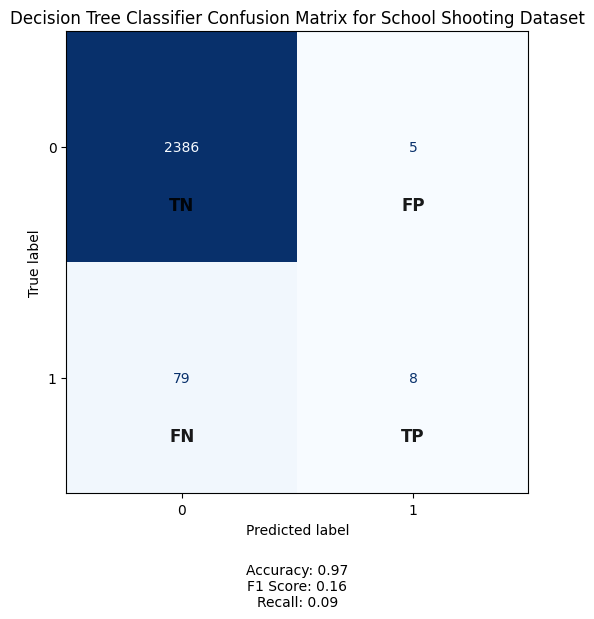

In [142]:
# Accuracy, F1 score, and Recall score
accuracy = accuracy_score(y_test, preds) # measures the overall correctness of the model i.e. how many predictions were accurate
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall Score: ", recall)

# add accuraacy, f1 score, and recall score to the confusion matrix plot
ax.text(0.5, -0.2, f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}',
        fontsize=10, ha='center', va='center', transform=ax.transAxes)
disp.figure_.savefig('../recourses/img/plots/dt_cm_school.png', bbox_inches='tight', dpi=300)
disp.figure_

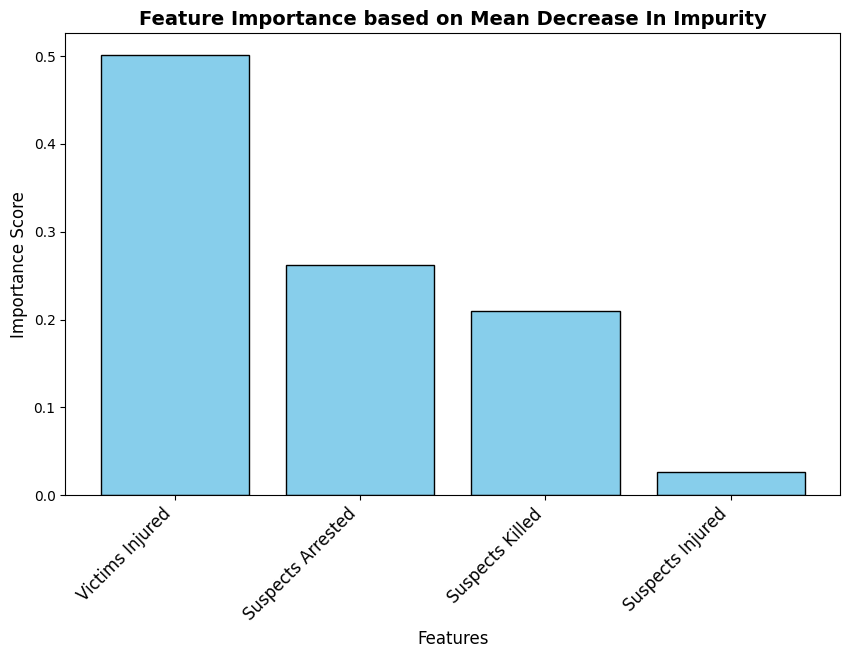

In [143]:
# Visualize Feature Importance

importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance based on Mean Decrease In Impurity", fontsize = 14, weight = 'bold')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center', color = 'skyblue', edgecolor = 'black')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation = 45, ha = 'right', fontsize = 12)
plt.xlabel("Features", fontsize = 12)
plt.ylabel("Importance Score", fontsize = 12)
plt.savefig('../recourses/img/plots/dt_feature_importance_school.png', bbox_inches='tight', dpi=300)
plt.show()

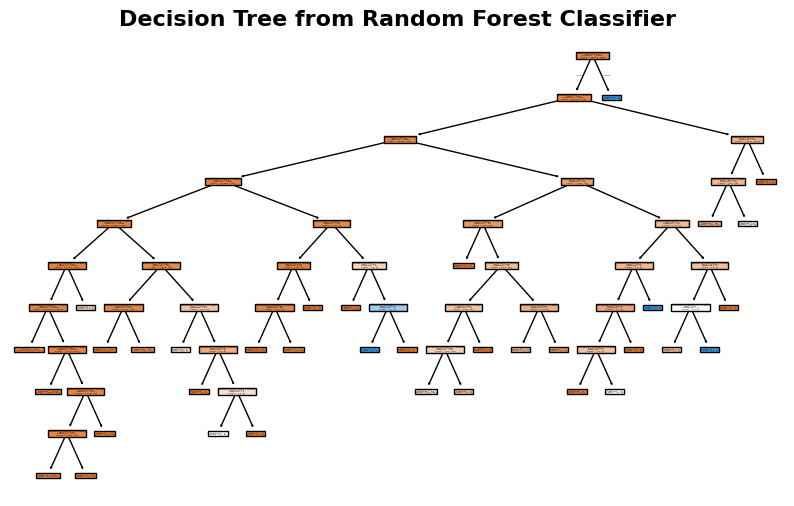

In [144]:
# Visualizing the Decision Tree for a Random Forest Classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(classifier.estimators_[0], feature_names = features, filled = True)
plt.title("Decision Tree from Random Forest Classifier", fontsize=16, weight='bold')
plt.savefig('../recourses/img/plots/dt_rf_school.png', bbox_inches='tight', dpi=300)
plt.show()

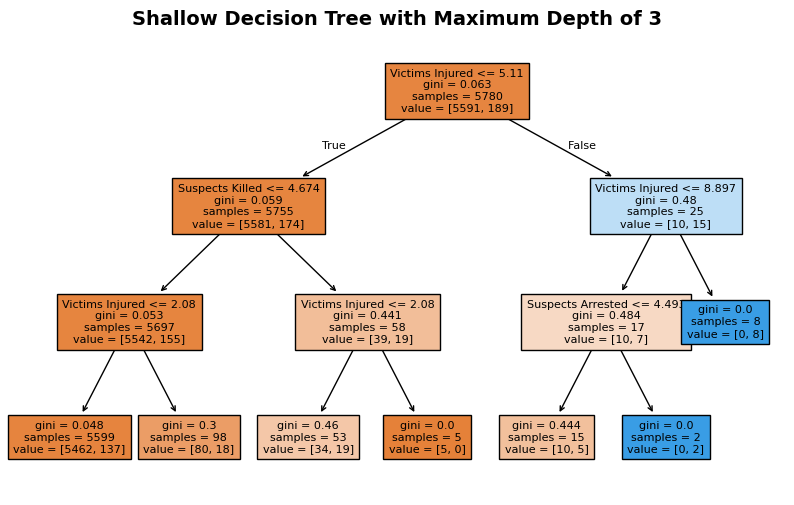

In [145]:
shallow = DecisionTreeClassifier(max_depth=3, random_state=0)
shallow.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(shallow, feature_names=features, filled=True, fontsize=8)
plt.title("Shallow Decision Tree with Maximum Depth of 3", fontsize=14, weight='bold')
plt.savefig('../recourses/img/plots/dt_shallow_school.png', bbox_inches='tight', dpi=300)
plt.show()

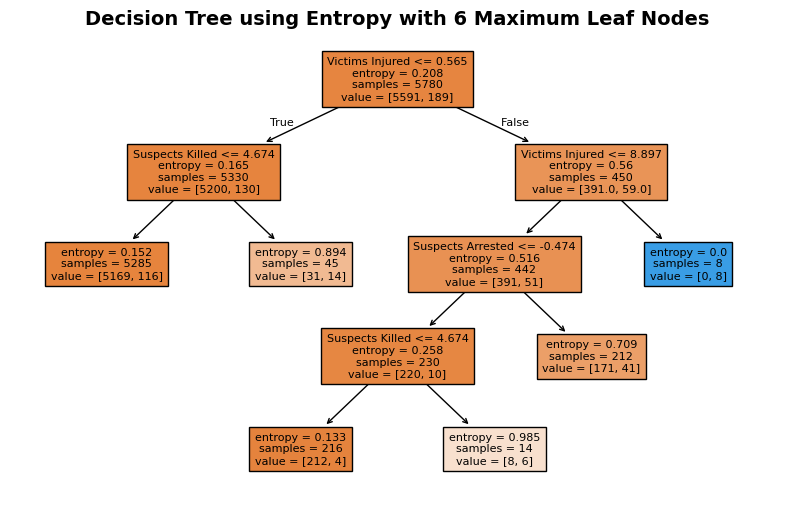

In [146]:
# Entropy-based tree with limited leaves (different splitting criterion)
entropy_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=0)
entropy_dt.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(entropy_dt, feature_names=features, filled=True, fontsize=8)
plt.title("Decision Tree using Entropy with 6 Maximum Leaf Nodes", fontsize=14, weight='bold')
plt.savefig('../recourses/img/plots/dt_entropy_school.png', bbox_inches='tight', dpi=300)
plt.show()

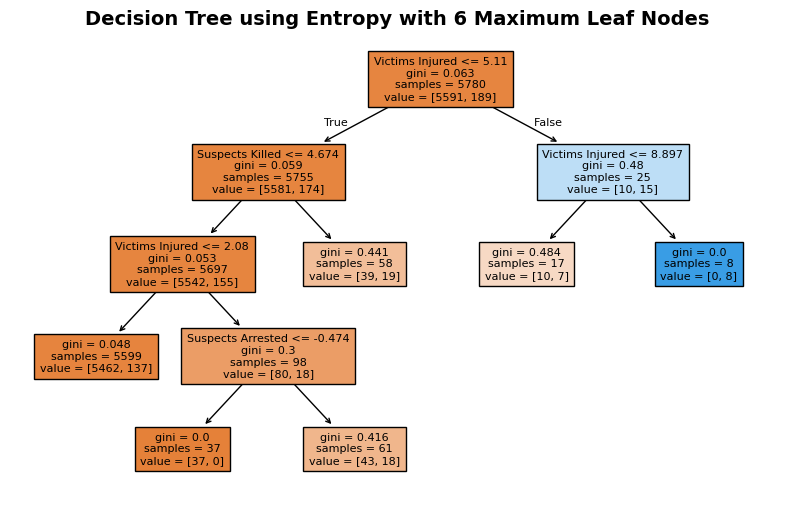

In [147]:
# Gini-based tree with limited leaves (different splitting criterion)
gini_dt = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=6, random_state=0)
gini_dt.fit(X_train, y_train)
plt.figure(figsize=(10,6))
plot_tree(gini_dt, feature_names=features, filled=True, fontsize=8)
plt.title("Decision Tree using Entropy with 6 Maximum Leaf Nodes", fontsize=14, weight='bold')
plt.savefig('../recourses/img/plots/dt_gini_school.png', bbox_inches='tight', dpi=300)
plt.show()

## Officer Involved Shootings

In [148]:
# reading the dataset
df = pd.read_csv("gunviolencearchive_officer_involved_shooting.csv")

# cleaning up a little bit
df = df.fillna(0)
df['Target'] = (df['Victims Killed'] > 0).astype(int)
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Target
0,3104306,"December 29, 2024",Tennessee,Philadelphia,2300 block of Reed Springs Rd,0,1,0,0,1,0.0,0
1,3102679,"December 26, 2024",Indiana,Marion,3000 block of County Rd 450 N,0,1,0,1,1,0.0,0
2,3098753,"December 20, 2024",Louisiana,Ville Platte,N Chataignier St,0,3,0,0,0,0.0,0
3,3099323,"December 20, 2024",Oklahoma,Oklahoma City,6600 block of Bayberry Dr,1,2,1,0,0,0.0,1
4,3099063,"December 20, 2024",Ohio,Dayton (Trotwood),Shiloh Springs Rd and Olive Rd,0,1,1,0,0,0.0,0


In [149]:
features = ['Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [150]:
# No. of instance with 1 in target variable for training set
display(y_train.value_counts())

# No. of instance with 1 in target variable for test set
display(y_test.value_counts())

Target
0    1833
1     209
Name: count, dtype: int64

Target
0    780
1     96
Name: count, dtype: int64

In [151]:
# display the data after splitting

# training set
display(pd.DataFrame(X_train).head(10))
display(pd.DataFrame(y_train).head(10))

# combine X_train and y_train for better visualization
train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=["Target"])], axis=1)
display(train_df.head(10))
os.makedirs('../../recourses/img/tables', exist_ok=True)
dfi.export(train_df.head(10), '../recourses/img/tables/dt_train_officer.png', table_conversion='chrome')

# test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())

# combine X_test and y_test for better visualization
test_df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test, columns=["Target"])], axis=1)
display(test_df.head(10))
os.makedirs('../../recourses/img/tables', exist_ok=True)
dfi.export(test_df.head(10), '../recourses/img/tables/dt_test_officer.png', table_conversion='chrome')

,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
1,1,0,1,1
384,1,0,0,1
530,2,1,0,0
588,1,1,0,0
1032,2,0,0,0
2872,2,1,0,0
453,3,0,0,1
1277,1,1,0,0
1318,1,1,0,0
700,1,0,0,0


,Target
1,0
384,0
530,0
588,0
1032,0
2872,0
453,0
1277,1
1318,0
700,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Target
1,1,0,1,1,0
384,1,0,0,1,0
530,2,1,0,0,0
588,1,1,0,0,0
1032,2,0,0,0,0
2872,2,1,0,0,0
453,3,0,0,1,0
1277,1,1,0,0,1
1318,1,1,0,0,0
700,1,0,0,0,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
380,1,1,0,0
2598,1,1,0,0
1774,1,0,0,0
841,1,1,0,0
22,1,0,0,1


,Target
380,0
2598,0
1774,0
841,0
22,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Target
380,1,1,0,0,0
2598,1,1,0,0,0
1774,1,0,0,0,0
841,1,1,0,0,0
22,1,0,0,1,0
2898,3,1,0,0,0
914,1,0,0,0,0
117,0,1,0,0,1
1678,2,0,0,0,0
1099,1,0,1,1,0


In [152]:
# Scaling the features
# Feature scaling is performed to ensure that the model is not biased towards the features with higher magnitude

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [153]:
# Displaying the scaled training set

display(pd.DataFrame(X_train).head())

,0,1,2,3
0,-0.057171,-0.757190,1.937533,0.647990
1,-0.057171,-0.757190,-0.474932,0.647990
2,0.044877,1.243045,-0.474932,-0.731776
3,-0.057171,1.243045,-0.474932,-0.731776
4,0.044877,-0.757190,-0.474932,-0.731776


In [154]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)
preds

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

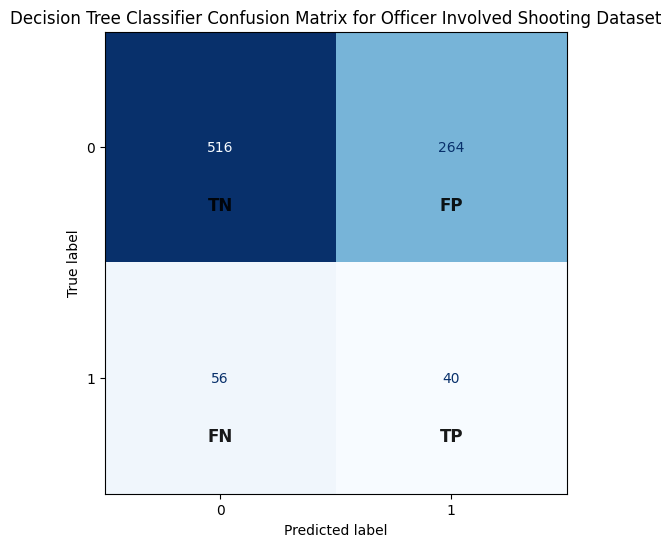

In [155]:
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= classifier.classes_)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
ax.set_title("Decision Tree Classifier Confusion Matrix for Officer Involved Shooting Dataset")

# Label coordinates (slightly below numeric counts)
offset_y = -0.25  # small downward shift from center
offset_x = -0.5      # small horizontal shift

# Overlay TN / FP / FN / TP *below* the numbers
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label, color = "TN", "black"
        elif i == 0 and j == 1:
            label, color = "FP", "black"
        elif i == 1 and j == 0:
            label, color = "FN", "black"
        else:
            label, color = "TP", "black"

        ax.text(j + 0.5 + offset_x, i + 0.5 + offset_y, label,
                color=color, fontsize=12, weight='bold',
                ha='center', va='center', alpha=0.9)
disp

Accuracy:  0.634703196347032
F1 Score:  0.2
Recall Score:  0.4166666666666667


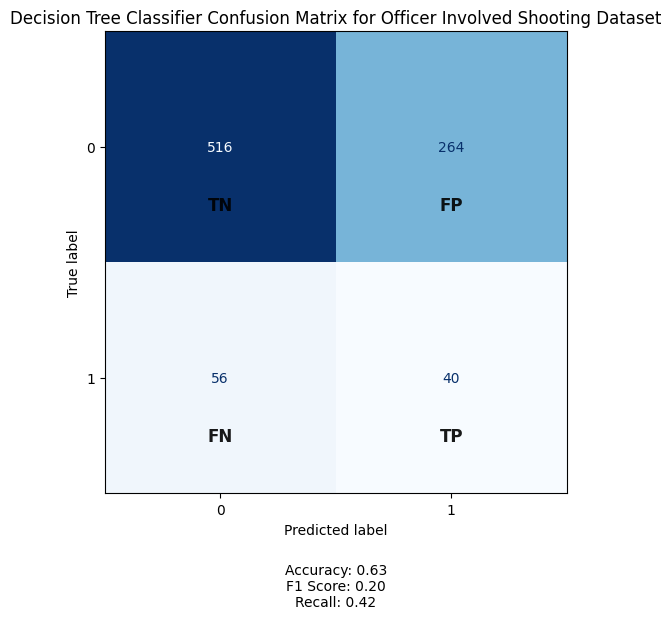

In [156]:
# Accuracy, F1 score, and Recall score
accuracy = accuracy_score(y_test, preds) # measures the overall correctness of the model i.e. how many predictions were accurate
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall Score: ", recall)

# add accuraacy, f1 score, and recall score to the confusion matrix plot
ax.text(0.5, -0.2, f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}',
        fontsize=10, ha='center', va='center', transform=ax.transAxes)
disp.figure_.savefig('../recourses/img/plots/dt_cm_officer.png', bbox_inches='tight', dpi=300)
disp.figure_

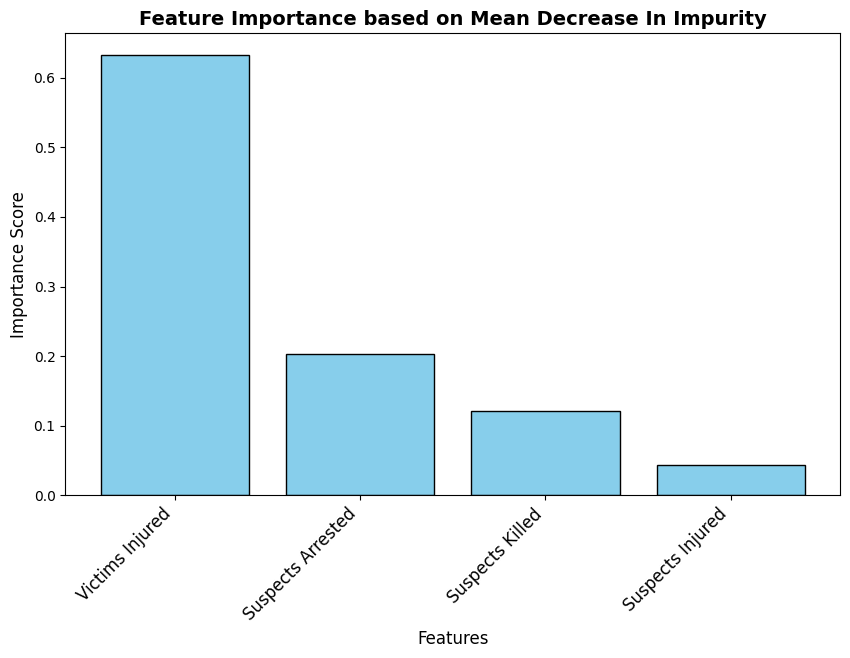

In [157]:
# Visualize Feature Importance

importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance based on Mean Decrease In Impurity", fontsize = 14, weight = 'bold')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center', color = 'skyblue', edgecolor = 'black')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation = 45, ha = 'right', fontsize = 12)
plt.xlabel("Features", fontsize = 12)
plt.ylabel("Importance Score", fontsize = 12)
plt.savefig('../recourses/img/plots/dt_feature_importance_officer.png', bbox_inches='tight', dpi=300)
plt.show()

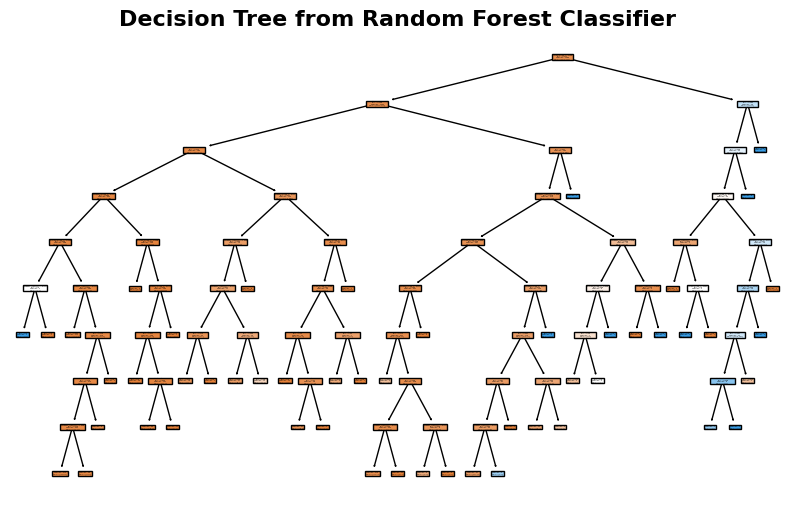

In [158]:
# Visualizing the Decision Tree for a Random Forest Classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(classifier.estimators_[0], feature_names = features, filled = True)
plt.title("Decision Tree from Random Forest Classifier", fontsize=16, weight='bold')
plt.savefig('../recourses/img/plots/dt_rf_officer.png', bbox_inches='tight', dpi=300)
plt.show()

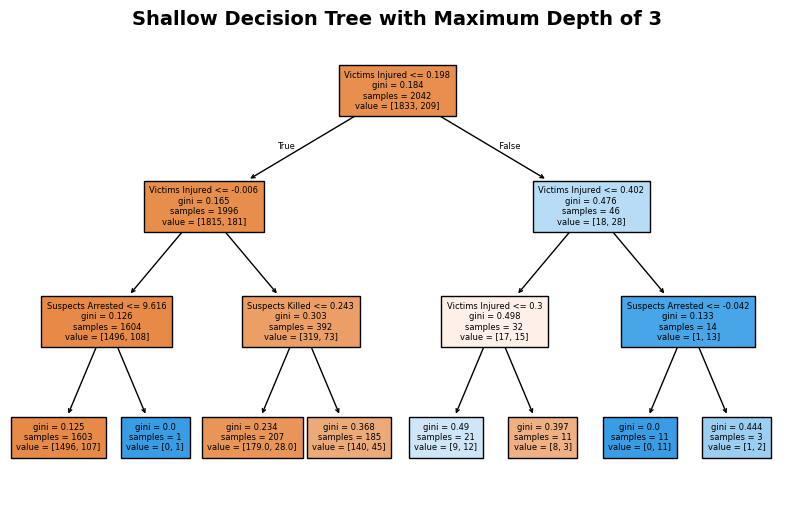

In [159]:
shallow = DecisionTreeClassifier(max_depth=3, random_state=0)
shallow.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(shallow, feature_names=features, filled=True, fontsize=6)
plt.title("Shallow Decision Tree with Maximum Depth of 3", fontsize=14, weight='bold')
plt.savefig('../recourses/img/plots/dt_shallow_officer.png', bbox_inches='tight', dpi=300)
plt.show()

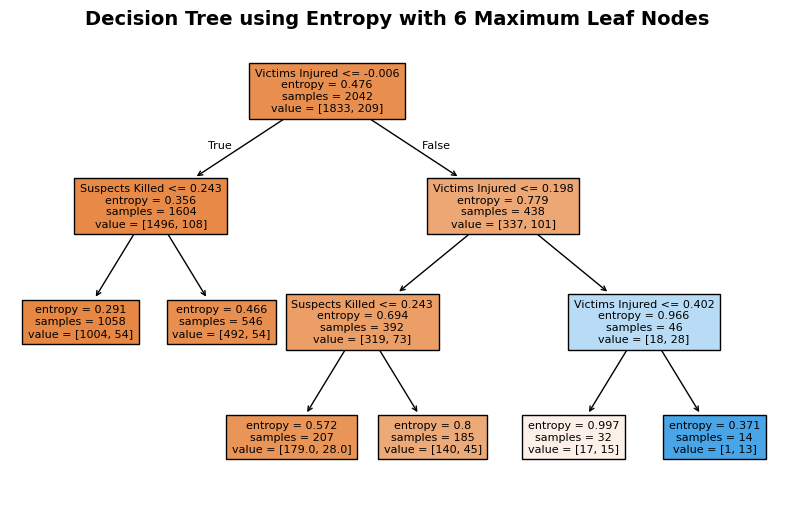

In [160]:
# Entropy-based tree with limited leaves (different splitting criterion)
entropy_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6, random_state=0)
entropy_dt.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plot_tree(entropy_dt, feature_names=features, filled=True, fontsize=8)
plt.title("Decision Tree using Entropy with 6 Maximum Leaf Nodes", fontsize=14, weight='bold')
plt.savefig('../recourses/img/plots/dt_entropy_officer.png', bbox_inches='tight', dpi=300)
plt.show()

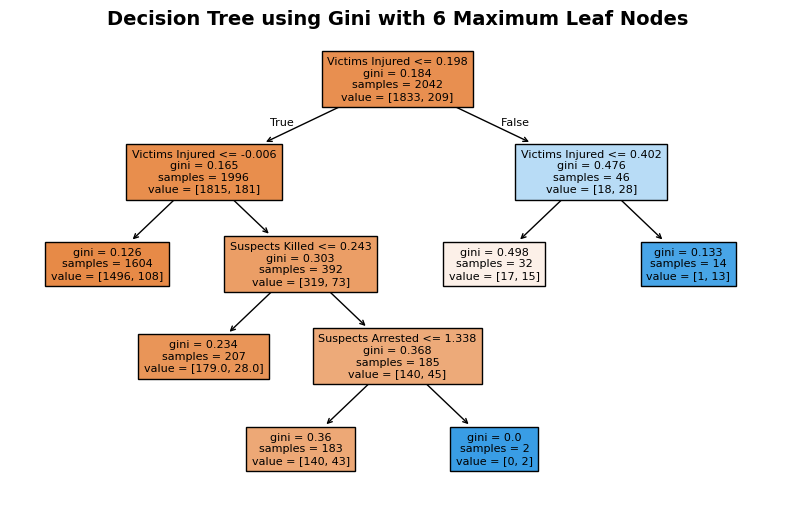

In [162]:
# Gini-based tree with limited leaves (different splitting criterion)
gini_dt = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=6, random_state=0)
gini_dt.fit(X_train, y_train)
plt.figure(figsize=(10,6))
plot_tree(gini_dt, feature_names=features, filled=True, fontsize=8)
plt.title("Decision Tree using Gini with 6 Maximum Leaf Nodes", fontsize=14, weight='bold')
plt.savefig('../recourses/img/plots/dt_gini_officer.png', bbox_inches='tight', dpi=300)
plt.show()